In [1]:
# 필요한 패키지 설치
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['figure.dpi'] = 150

In [2]:
import matplotlib.font_manager as fm

# 한글 폰트 지원
font_path = 'C:/Windows/Fonts/malgun.ttf'

# 폰트 이름 가져오기
font_name = fm.FontProperties(fname=font_path).get_name()

# 폰트 설정
plt.rc('font', family=font_name)

In [3]:
# 데이터 불러오기
# https://www.kaggle.com/datasets/sewonghwang/GPU-CPU-benchmark
df = pd.read_csv("../resource/W3/GPU_CPU_benchmark.csv")

# 데이터 샘플 확인
df.head()

,Device Name,Compute Type,OS,Median Score
0,12X Intel Xeon CPU E5-2450 0 @ 2.10GHz,CPU,Linux,78.570
1,24X Intel Xeon CPU E5-2690 v3 @ 2.60GHz,CPU,Windows,297.940
2,2X 12th Gen Intel Core i9-12900KF,CPU,Windows,424.470
3,2X AMD EPYC 7343 16-Core Processor,CPU,Linux,439.210
4,2X AMD Opteron Processor 6276,CPU,Windows,81.478


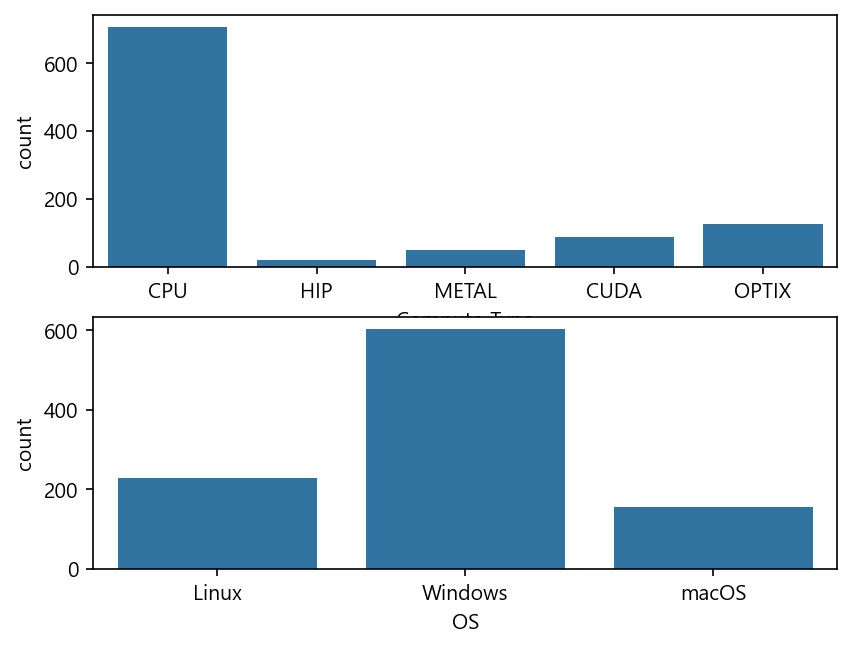

In [4]:
# 변경할 컬럼 범주 별 분포 확인 시각화
fig, ax = plt.subplots(nrows=2)

# Compute Type 컬럼 범주 별 분포
# plt.figure(figsize = (4, 2))
sns.countplot(x="Compute Type", data=df, ax=ax[0])
plt.xlabel('Compute Type', fontsize=10)

# OS 컬럼 범주 별 분포
# plt.figure(figsize = (4, 2))
sns.countplot(x="OS", data=df, ax=ax[1])
plt.xlabel('OS', fontsize=10)

plt.show()

In [5]:
# 전체 컬럼 일괄 가변수 처리

df1 = pd.get_dummies(df)

df1.head()

,Median Score,Device Name_12X Intel Xeon CPU E5-2450 0 @ 2.10GHz,Device Name_24X Intel Xeon CPU E5-2690 v3 @ 2.60GHz,Device Name_2X 12th Gen Intel Core i9-12900KF,Device Name_2X AMD EPYC 7343 16-Core Processor,Device Name_2X AMD Opteron Processor 6276,Device Name_2X AMD Opteron(tm) Processor 6328,Device Name_2X AMD Ryzen Threadripper PRO 3995WX 64-Cores,Device Name_2X Genuine Intel CPU 0000 @ 2.00GHz,Device Name_2X Genuine Intel CPU 0000 @ 2.10GHz,...,Device Name_T500,Device Name_Virtual CPU @ 2.99GHz,Compute Type_CPU,Compute Type_CUDA,Compute Type_HIP,Compute Type_METAL,Compute Type_OPTIX,OS_Linux,OS_Windows,OS_macOS
0,78.570,True,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
1,297.940,False,True,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
2,424.470,False,False,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
3,439.210,False,False,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
4,81.478,False,False,False,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False


In [6]:
# 특정 컬럼만 가변수 처리

df2 = pd.get_dummies(df, columns = ['Compute Type', 'OS'])

df2.head()

,Device Name,Median Score,Compute Type_CPU,Compute Type_CUDA,Compute Type_HIP,Compute Type_METAL,Compute Type_OPTIX,OS_Linux,OS_Windows,OS_macOS
0,12X Intel Xeon CPU E5-2450 0 @ 2.10GHz,78.570,True,False,False,False,False,True,False,False
1,24X Intel Xeon CPU E5-2690 v3 @ 2.60GHz,297.940,True,False,False,False,False,False,True,False
2,2X 12th Gen Intel Core i9-12900KF,424.470,True,False,False,False,False,False,True,False
3,2X AMD EPYC 7343 16-Core Processor,439.210,True,False,False,False,False,True,False,False
4,2X AMD Opteron Processor 6276,81.478,True,False,False,False,False,False,True,False


In [7]:
df2.describe(include='all')

,Device Name,Median Score,Compute Type_CPU,Compute Type_CUDA,Compute Type_HIP,Compute Type_METAL,Compute Type_OPTIX,OS_Linux,OS_Windows,OS_macOS
count,1006,1006.000000,1006,1006,1006,1006,1006,1006,1006,1006
unique,731,NaN,2,2,2,2,2,2,2,2
top,NVIDIA GeForce RTX 3090,NaN,True,False,False,False,False,False,True,False
freq,4,NaN,708,919,986,958,880,776,603,851
mean,NaN,608.232868,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,5150.323904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,3.360000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,57.149750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,141.062500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,363.055000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# 하나의 가변수 범주 제거 옵션 적용
df3 = pd.get_dummies(df, columns = ['Compute Type','OS'],drop_first=True)

df3.head()

,Device Name,Median Score,Compute Type_CUDA,Compute Type_HIP,Compute Type_METAL,Compute Type_OPTIX,OS_Windows,OS_macOS
0,12X Intel Xeon CPU E5-2450 0 @ 2.10GHz,78.570,False,False,False,False,False,False
1,24X Intel Xeon CPU E5-2690 v3 @ 2.60GHz,297.940,False,False,False,False,True,False
2,2X 12th Gen Intel Core i9-12900KF,424.470,False,False,False,False,True,False
3,2X AMD EPYC 7343 16-Core Processor,439.210,False,False,False,False,False,False
4,2X AMD Opteron Processor 6276,81.478,False,False,False,False,True,False


In [9]:
# 결측값을 별도의 컬럼으로 처리 옵션 적용

df4 = pd.get_dummies(df, columns = ['Compute Type','OS']
                     , drop_first=True, dummy_na=True)

df4.head()

,Device Name,Median Score,Compute Type_CUDA,Compute Type_HIP,Compute Type_METAL,Compute Type_OPTIX,Compute Type_nan,OS_Windows,OS_macOS,OS_nan
0,12X Intel Xeon CPU E5-2450 0 @ 2.10GHz,78.570,False,False,False,False,False,False,False,False
1,24X Intel Xeon CPU E5-2690 v3 @ 2.60GHz,297.940,False,False,False,False,False,True,False,False
2,2X 12th Gen Intel Core i9-12900KF,424.470,False,False,False,False,False,True,False,False
3,2X AMD EPYC 7343 16-Core Processor,439.210,False,False,False,False,False,False,False,False
4,2X AMD Opteron Processor 6276,81.478,False,False,False,False,False,True,False,False
